In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Load the dataset
df = pd.read_csv("coffee_dataset.csv")

# Display the first few rows of the dataset
df.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [3]:
# Convert the 'review_date' column to datetime - updated date format
df['review_date'] = pd.to_datetime(df['review_date'], format='%B %Y')

# Create datetime objects for the binning
start_date = pd.to_datetime('2017-11-01')
pandemic_start = pd.to_datetime('2020-03-01')
pandemic_end = pd.to_datetime('2021-12-31')
end_date = df['review_date'].max()

In [4]:
# Check the data types of columns
print(df.dtypes)

name                   object
roaster                object
roast                  object
loc_country            object
origin                 object
100g_USD              float64
rating                  int64
review_date    datetime64[ns]
review                 object
dtype: object


In [5]:
# Basic statistics of numerical columns
print(df.describe())

          100g_USD       rating
count  1246.000000  1246.000000
mean     10.479125    93.306581
std      13.486674     1.479413
min       0.170000    84.000000
25%       5.260000    93.000000
50%       6.170000    93.000000
75%       9.600000    94.000000
max     132.280000    97.000000


## Exploratory Data Analysis (EDA)

### Roaster Analysis:

#### Identify the most frequent roasters in the dataset using the 'roaster' column

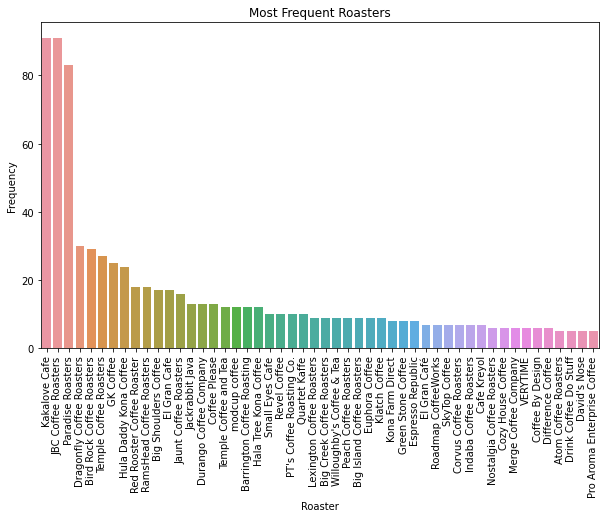

In [6]:
# Most frequent roasters
roaster_counts = df['roaster'].value_counts().head(50)
plt.figure(figsize=(10, 6))
sns.barplot(x=roaster_counts.index, y=roaster_counts.values)
plt.xlabel('Roaster')
plt.ylabel('Frequency')
plt.title('Most Frequent Roasters')
plt.xticks(rotation=90)
plt.show()

#### Analyzing the average rating for each roaster to understand the quality of coffee they produce.

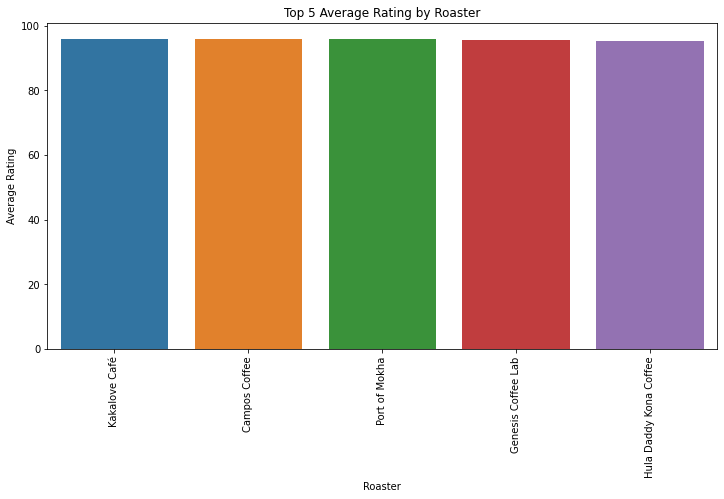

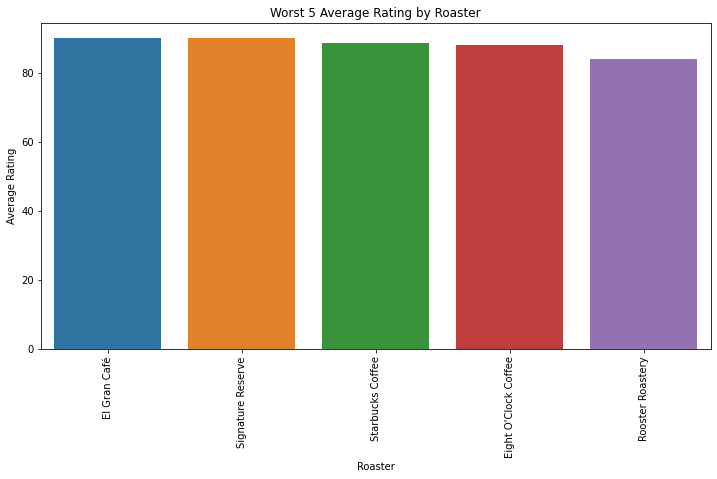

In [7]:
# Average rating by roaster
avg_rating_by_roaster = df.groupby('roaster')['rating'].mean()

# Sort the roasters based on average rating in descending order
sorted_roasters = avg_rating_by_roaster.sort_values(ascending=False)

# Get the best 5 and worst 5 roasters
best_5_roasters = sorted_roasters.head(5)
worst_5_roasters = sorted_roasters.tail(5)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=best_5_roasters.index, y=best_5_roasters.values)
plt.xlabel('Roaster')
plt.ylabel('Average Rating')
plt.title('Top 5 Average Rating by Roaster')
plt.xticks(rotation=90)
plt.show()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=worst_5_roasters.index, y=worst_5_roasters.values)
plt.xlabel('Roaster')
plt.ylabel('Average Rating')
plt.title('Worst 5 Average Rating by Roaster')
plt.xticks(rotation=90)
plt.show()

### Origin Analysis:

#### Exploring the distribution of coffee origins using the 'origin' column

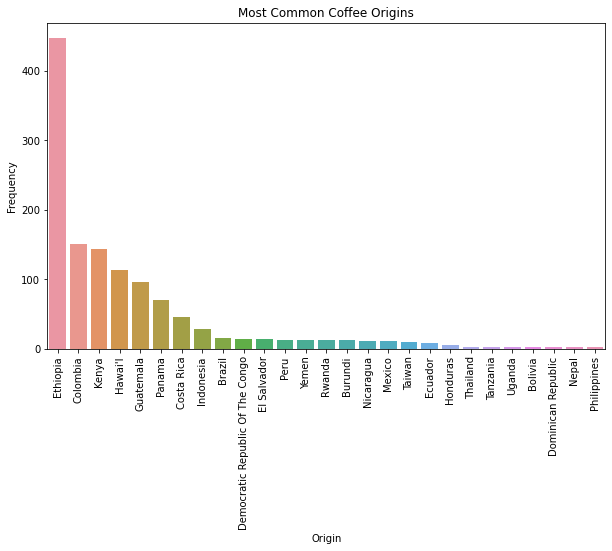

In [8]:
# Most common coffee origins
origin_counts = df['origin'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=origin_counts.index, y=origin_counts.values)
plt.xlabel('Origin')
plt.ylabel('Frequency')
plt.title('Most Common Coffee Origins')
plt.xticks(rotation=90)
plt.show()

#### Investigating the relationship between origin and price, rating, or roast level.

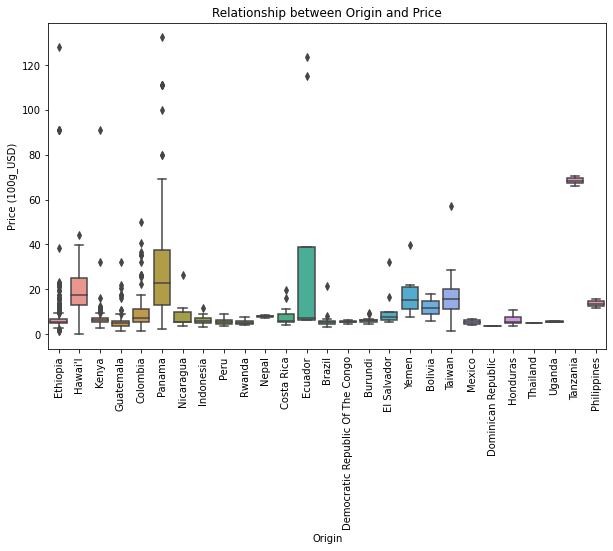

In [9]:
# Relationship between origin and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='100g_USD', data=df)
plt.xlabel('Origin')
plt.ylabel('Price (100g_USD)')
plt.title('Relationship between Origin and Price')
plt.xticks(rotation=90)
plt.show()

The box plot provides valuable insights into the distribution of coffee prices (in 100g USD) across different coffee origins. Each box represents the interquartile range (IQR), which spans from the 25th percentile (Q1) to the 75th percentile (Q3) of the price distribution for a specific origin. The line inside the box indicates the median price, while the whiskers extending from the box show the range of observed prices, excluding outliers. Outliers, if present, are represented by individual data points beyond the whiskers.

The boxplot diagram displays the distribution of coffee prices (in 100g USD) for different coffee origins. Each box represents the price distribution for a specific origin, and the whiskers extend to the minimum and maximum observed values within 1.5 times the interquartile range (IQR).<br>

Some examples are:

Bolivia: The average price of coffee from Bolivia is approximately 11.91 per 100g. The middle 50% of prices fall between 5.88 and 17.94, with some outliers beyond this range.

Brazil: The average price of coffee from Brazil is around 6.18 per 100g. The middle 50% of prices is between 3.19 and 21.46, with a few outliers.

Colombia: The average price of coffee from Colombia is roughly 9.93 per 100g. The middle 50% of prices is between 1.49 and 49.97, with some outliers.

Costa Rica: The average price of coffee from Costa Rica is approximately 7.27 per 100g. The middle 50% of prices falls within 3.97 and 19.84, with no outliers.

The whiskers are not visible for some origins because there are no outliers beyond the defined range (1.5 times the IQR). The whiskers would extend to the minimum and maximum prices within that range if there were any outliers. Additionally, some origins have an interquartile range close to zero, which means there is very little variability in their prices.

Upon analyzing the box plot, we can draw several conclusions about the coffee prices from different origins:

Countries with a longer line on top (e.g., Panama): The longer line on top of the box indicates that the upper quartile (Q3) of prices for these origins is significantly higher than the median. This suggests that some batches of coffee from these countries may command premium prices, resulting in a right-skewed price distribution. The presence of outliers beyond the whiskers implies that occasional high-priced coffees can be found, possibly due to unique or exceptional coffee varieties.

Countries with small boxes (e.g., Democratic Republic Of The Congo, Thailand): They indicate that the interquartile range (IQR) is relatively narrow, with prices concentrated within a smaller range. This suggests that the coffee prices from these countries show less variability compared to other origins. Additionally, the absence of outliers beyond the whiskers indicates that the prices in these countries are relatively consistent, without extreme values.

Overall, the box plot provides valuable insights into the price distributions of coffee origins. The variations in box length and presence of outliers indicate the diversity and uniqueness of coffee pricing across different countries. Understanding these differences can help coffee buyers and enthusiasts make informed decisions based on their preferences and budget constraints. Additionally, it can offer valuable information to coffee producers and sellers in marketing their products effectively based on regional price trends and consumer preferences.

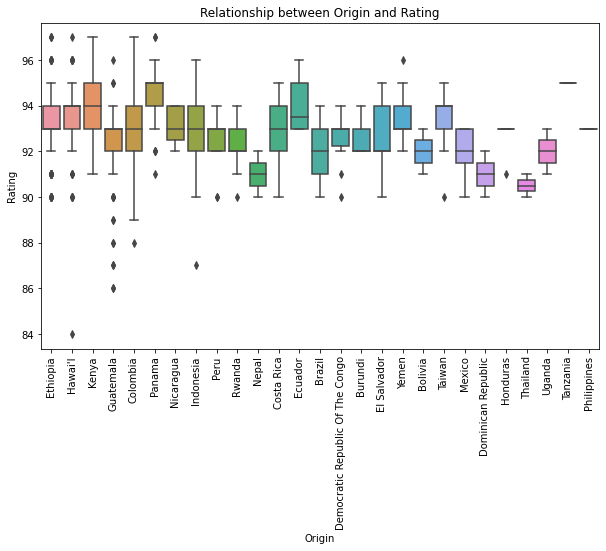

In [10]:
# Relationship between origin and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='rating', data=df)
plt.xlabel('Origin')
plt.ylabel('Rating')
plt.title('Relationship between Origin and Rating')
plt.xticks(rotation=90)
plt.show()

Upon analyzing the box plot and the provided statistics, several observations can be made:

1. Colombia, Indonesia, and Ethiopia: These origins have boxes that are relatively wide, indicating a wider interquartile range (IQR). This implies that the middle 50% of coffee ratings for these countries are spread over a broader range compared to other origins. The presence of outliers beyond the whiskers indicates that exceptional coffees with higher or lower ratings can be found in these countries, contributing to the wider range.

2. El Salvador: The box for El Salvador does not have a visible line inside it because the median rating is at the edge of the box. This suggests that the middle 50% of coffee ratings for El Salvador are concentrated within a narrow range, leaving little variation between the 25th and 75th percentiles.

3. Tanzania: The box for Tanzania is a horizontal line, indicating that all coffee ratings fall within the same value. This means that there is no variability in the ratings, and all Tanzanian coffees have the same rating, making it a unique case among the origins.

In conclusion, the varying width of boxes, presence of outliers, and the position of the median line provide insights into the variability and uniqueness of coffee quality among different countries. Coffee buyers and enthusiasts can use this information to understand the rating distributions and make informed decisions based on their preferences. Furthermore, coffee producers from countries with wider ranges and occasional exceptional ratings may use this data to market their high-quality coffees, while countries with consistent ratings can leverage their consistency as a selling point.

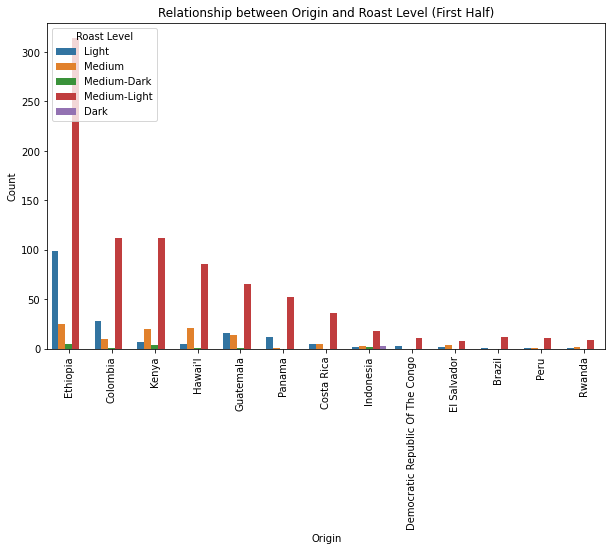

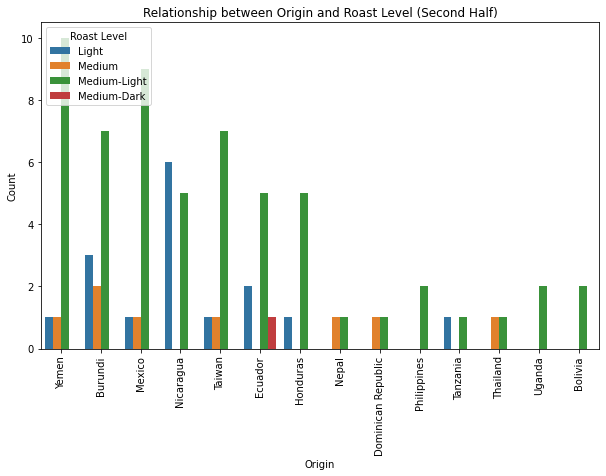

In [11]:
# Calculate counts for each combination of origin and roast level
counts = df.groupby(['origin', 'roast']).size().reset_index(name='count')

# Sort the origins based on the total count values across all roast levels
sorted_origins = counts.groupby('origin')['count'].sum().sort_values(ascending=False).index
# Reorder the rows in counts based on sorted_origins
counts_sorted = counts.set_index('origin').loc[sorted_origins].reset_index()
# Divide the sorted origins into two halves
half_length = len(sorted_origins) // 2
first_half_origins = sorted_origins[:half_length]
second_half_origins = sorted_origins[half_length:]

# Filter the counts_sorted DataFrame for the first half origins and plot the graph
first_half_counts = counts_sorted[counts_sorted['origin'].isin(first_half_origins)]
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='count', hue='roast', data=first_half_counts)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Relationship between Origin and Roast Level (First Half)')
plt.xticks(rotation=90)
plt.legend(title='Roast Level')
plt.show()

# Filter the counts_sorted DataFrame for the second half origins and plot the graph
second_half_counts = counts_sorted[counts_sorted['origin'].isin(second_half_origins)]
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='count', hue='roast', data=second_half_counts)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Relationship between Origin and Roast Level (Second Half)')
plt.xticks(rotation=90)
plt.legend(title='Roast Level')
plt.show()


### Price Analysis:

#### Understanding the price distribution

In [12]:
# Calculate basic statistics for price
price_stats = df['100g_USD'].describe()
print(price_stats)

count    1246.000000
mean       10.479125
std        13.486674
min         0.170000
25%         5.260000
50%         6.170000
75%         9.600000
max       132.280000
Name: 100g_USD, dtype: float64


#### Visualizing the distribution of prices using a histogram & box plot.

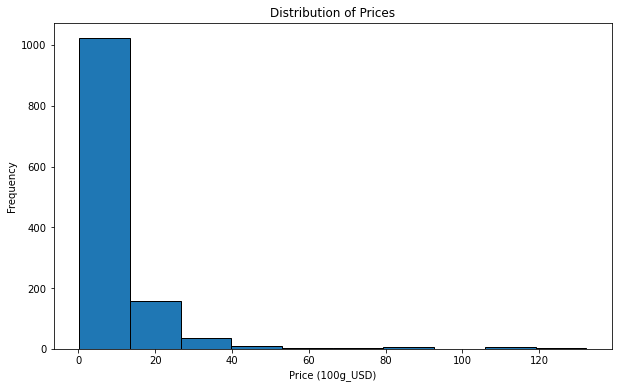

In [13]:
# Visualize the distribution of prices using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['100g_USD'], bins=10, edgecolor='k')
plt.xlabel('Price (100g_USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

The histogram displays the distribution of coffee prices (in 100g units) in the dataset. The x-axis represents the price range (in 100g USD) and the y-axis represents the frequency or count of occurrences for each price range. The histogram is divided into 10 bins, each representing a specific price range.

From the histogram, we can observe that the majority of coffee prices fall in the lower price range. The first bin, which includes prices from 0.17 to 13.38 USD per 100g, has the highest frequency count, with 1022 occurrences. As the price range increases, the frequency of occurrences decreases, indicating that higher-priced coffees are less common in the dataset.

The histogram shows that there are relatively few coffees with prices above 39.80 USD per 100g, as evidenced by the decreasing count in the higher bins. This suggests that premium-priced coffees are less prevalent in the dataset.

In conclusion, the Price (100g_USD) Distribution graph indicates that the majority of coffees in the dataset are priced at lower levels, with only a few coffees falling into the higher price ranges. This distribution of coffee prices can provide valuable insights for consumers and businesses in understanding the market trends and preferences for various price segments.

#### Analyzing the relationship between price and rating

Correlation coefficient between Price and Rating: 0.24


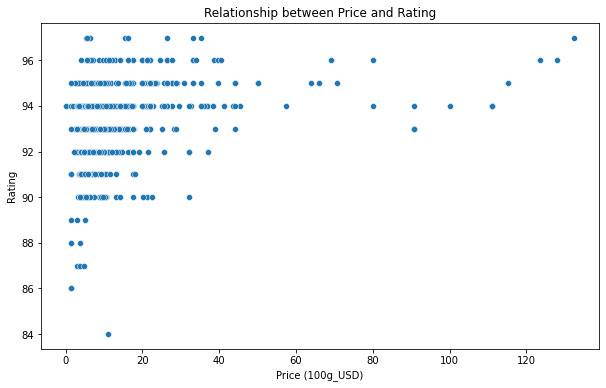

In [14]:
# Calculate the correlation coefficient between price and rating
correlation_coefficient = df['100g_USD'].corr(df['rating'])
print(f"Correlation coefficient between Price and Rating: {correlation_coefficient:.2f}")

# Analyze the relationship between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='100g_USD', y='rating', data=df)
plt.xlabel('Price (100g_USD)')
plt.ylabel('Rating')
plt.title('Relationship between Price and Rating')
plt.show()

Based on the correlation coefficient and the scatterplot, we can conclude that there is a weak positive relationship between the price and rating of the coffees. While there is some positive correlation, it is not strong enough to claim a direct causal relationship between price and rating. 

### Temporal Analysis:

#### Examining how the number of reviews has changed over time

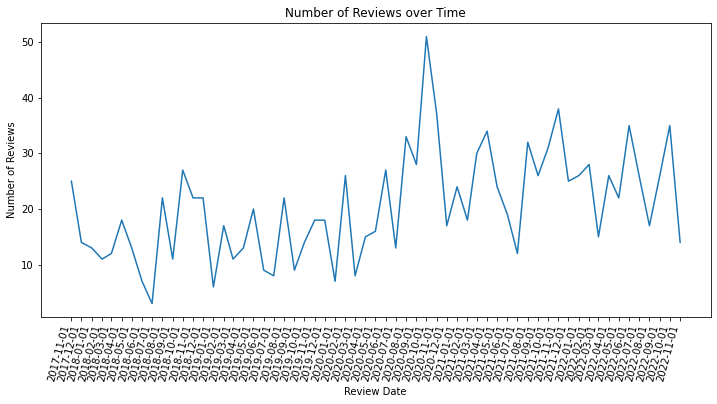

In [15]:
# Examine the number of reviews over time
plt.figure(figsize=(12, 6))
review_counts = df['review_date'].value_counts()
review_counts.index = pd.to_datetime(review_counts.index)
review_counts.plot()
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews over Time')

# Set x-axis ticks
plt.xticks(review_counts.index, rotation=75)
plt.show()

The graph shows a time series of review counts, with each point on the graph indicating the number of reviews received on a specific date. The line connects these points to show the overall trend in review counts over time.

From the graph, we can observe the following patterns:

Seasonal Patterns: There seem to be periodic spikes and dips in the number of reviews, indicating possible seasonal patterns. For example, there is a peak in October 2020, followed by another peak in November 2021, and similar patterns in other years.

Periods of Growth or Decline: The graph shows fluctuations in the number of reviews over time, suggesting periods of growth or decline in the review activity.

Highs and Lows: Some specific dates stand out as having a notably high or low number of reviews. For instance, October 2020 had the highest number of reviews with 51, while July 2018 had the lowest number with only 3 reviews.

Recent Trend: Towards the end of the graph, there appears to be an increasing trend in the number of reviews, indicating a possible growth in review activity.

#### Analyzing seasonal patterns in coffee reviews. Are certain months or seasons associated with higher or lower ratings?

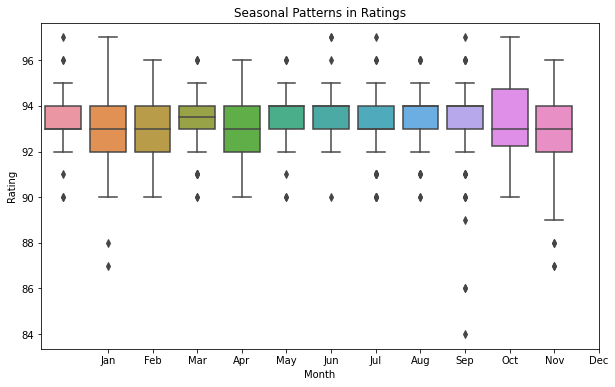

In [16]:
# Analyze seasonal patterns in coffee reviews
df['month'] = df['review_date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='rating', data=df)
plt.xlabel('Month')
plt.ylabel('Rating')
plt.title('Seasonal Patterns in Ratings')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

From this graph I can observe that:

1. The number of reviews (count) varies for each month, with the highest number in October (158 reviews) and the lowest in July (62 reviews).

2. The mean rating for each month ranges from 92.90 (December) to 93.69 (July), indicating a relatively small variation in mean ratings across months.

3. The standard deviation (std) measures the spread or dispersion of ratings around the mean. Smaller standard deviations indicate less variability, while larger values indicate greater variability. In this case, months with smaller standard deviations, such as August, September, and April, have ratings that are more tightly clustered around the mean, while months with larger standard deviations, like February and October, have more spread-out ratings.

The quartiles (25%, 50%, and 75%) represent the values below which a given percentage of ratings fall. For example, 25% of the ratings in January are below 93.00, and 75% are below 94.00.

#### Comparing the ratings and prices of coffee before, during, and after the COVID-19 pandemic to understand the pandemic's effects.

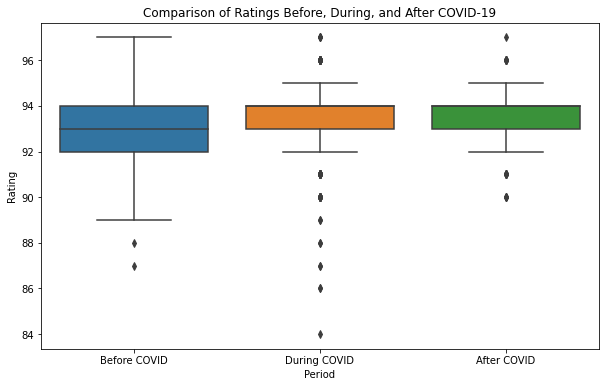

In [17]:
# Compare ratings before, during, and after the COVID-19 pandemic
df['period'] = pd.cut(df['review_date'], bins=[start_date, pandemic_start, pandemic_end, end_date], labels=['Before COVID', 'During COVID', 'After COVID'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='period', y='rating', data=df)
plt.xlabel('Period')
plt.ylabel('Rating')
plt.title('Comparison of Ratings Before, During, and After COVID-19')
plt.show()

The median rating (50th percentile) during all three periods is around 93, indicating that most reviews received similar average ratings during each period.
The ratings' spread, as indicated by the interquartile range (IQR), remains relatively consistent across the three periods, suggesting that the variability in coffee ratings did not change significantly.
The ratings' overall distribution does not exhibit substantial shifts during and after the COVID-19 pandemic, as the median and quartile values are relatively similar.

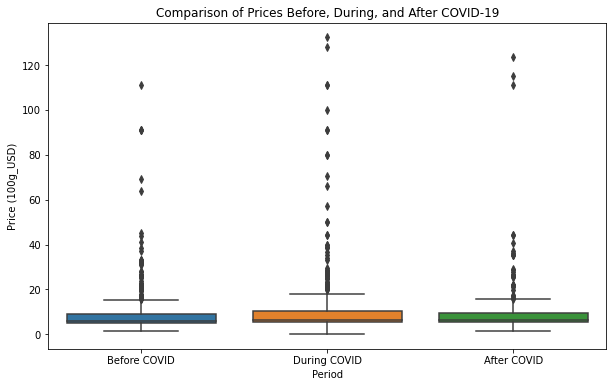

In [18]:
# Compare prices before, during, and after the COVID-19 pandemic
plt.figure(figsize=(10, 6))
sns.boxplot(x='period', y='100g_USD', data=df)
plt.xlabel('Period')
plt.ylabel('Price (100g_USD)')
plt.title('Comparison of Prices Before, During, and After COVID-19')
plt.show()

Median Price: The median (50th percentile) price for each period is represented by the line inside each box. The median price during the "During COVID" period is slightly higher than the other two periods, indicating a potential increase in prices during the pandemic.

Spread of Data: The width of each box represents the spread of data in the IQR. The "During COVID" period has a wider spread of prices compared to the other two periods, suggesting greater variability in prices during that time.

Outliers: The individual points outside the whiskers represent outlier prices, which are values significantly different from the rest of the data. The "After COVID" period has some higher-priced outliers, indicating that there were a few instances of exceptionally high prices during that time.

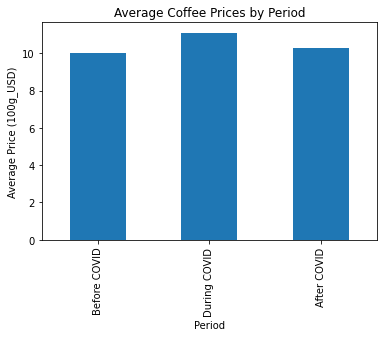

In [19]:
# Calculate the average prices for each period
average_prices = df.groupby('period')['100g_USD'].mean()

# Plot the average prices
average_prices.plot(kind='bar')
plt.xlabel('Period')
plt.ylabel('Average Price (100g_USD)')
plt.title('Average Coffee Prices by Period')
plt.show()

### Rating Analysis:

#### Exploring the distribution of ratings using a histogram.

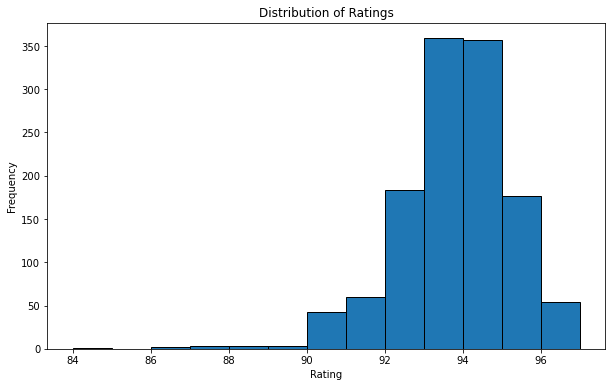

In [20]:
# Distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=13, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

#### Investigating whether there is a correlation between ratings and other variables such as price, roast level, & origin.

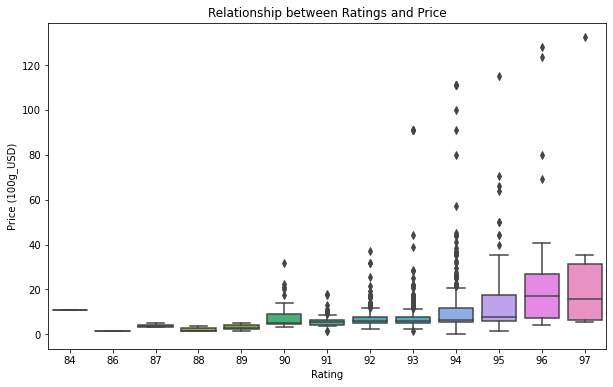

In [21]:
# Relationship between ratings and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='100g_USD', data=df)
plt.xlabel('Rating')
plt.ylabel('Price (100g_USD)')
plt.title('Relationship between Ratings and Price')
plt.show()

Based on the box plot, when the rating is higher, the median price tends to be higher as well. In other words, there is a positive relationship between the coffee's rating and its price. This means that, on average, higher-rated coffees are associated with higher prices per 100g (100 grams) in USD.

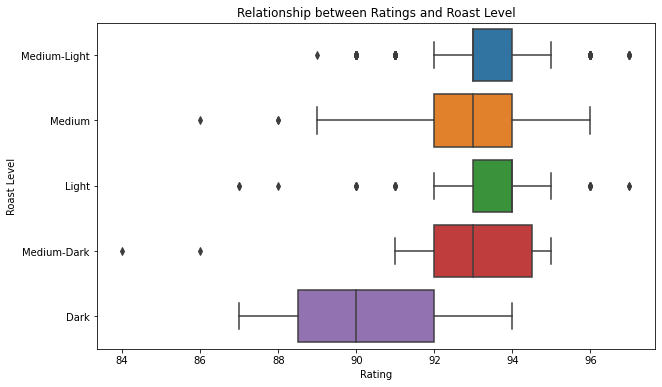

In [22]:
# Relationship between ratings and roast level
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='roast', data=df)
plt.xlabel('Rating')
plt.ylabel('Roast Level')
plt.title('Relationship between Ratings and Roast Level')
plt.show()

Dark Roast: There are three data points for the "Dark" roast level. The box plot shows that the ratings for dark-roasted coffees are relatively lower, with a mean rating of approximately 90.33. The ratings for dark roasts have a relatively narrow spread, indicating that the ratings tend to be clustered closer to the mean.

Light Roast: The box plot for the "Light" roast level displays a larger spread compared to dark roasts. The median rating for light-roasted coffees is around 93.55, which is higher than that of dark roasts. Light roasts have more variability in ratings, as indicated by the larger interquartile range (IQR).

Medium Roast: For the "Medium" roast level, the median rating is around 92.54, and the IQR suggests a moderate spread in ratings. Some medium-roasted coffees have relatively lower ratings, while others have higher ratings, resulting in a spread across the middle range.

Medium-Dark Roast: The "Medium-Dark" roast level has 15 data points. The median rating is around 92.33, and the spread in ratings is relatively broad. There are some higher-rated medium-dark roasts, but also a few with lower ratings.

Medium-Light Roast: The "Medium-Light" roast level has the most data points (904) and displays a median rating of approximately 93.37. The ratings for medium-light roasts have a relatively small spread, suggesting that most of them fall within a narrow range. Medium-light roasts generally receive higher ratings, with a few potential outliers having even higher ratings.

In summary, light and medium-light roasts tend to have higher ratings compared to dark and medium-dark roasts. Additionally, medium-light roasts have the highest number of data points, indicating that they are more prevalent in the dataset. The box plot provides a visual representation of how ratings vary among different roast levels, enabling easy comparison and understanding of their relationships.

#### Analyzing the relationship between ratings and sentiment scores. Are highly rated coffees more likely to have positive sentiment in their reviews?

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valentinatorres/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


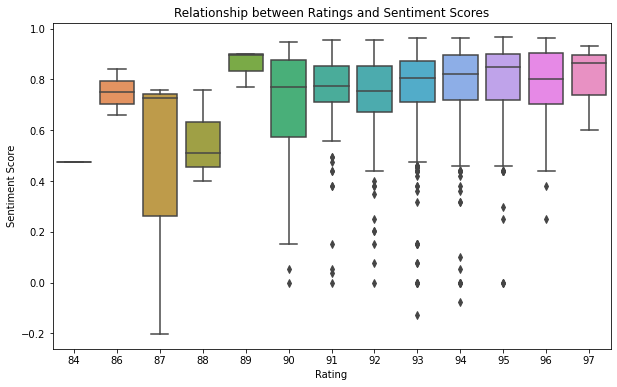

In [23]:
import nltk
nltk.download('vader_lexicon')
    
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Relationship between ratings and sentiment scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=df)
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.title('Relationship between Ratings and Sentiment Scores')
plt.show()

Approximately all the Ratings have mostly positive and a few neutral sentiments, we don't have enough data to state highly rated coffees more likely to have positive sentiment in their reviews.

### Text Analysis:

#### Word frequency analysis, to identify the most common words or phrases in the 'review' column.

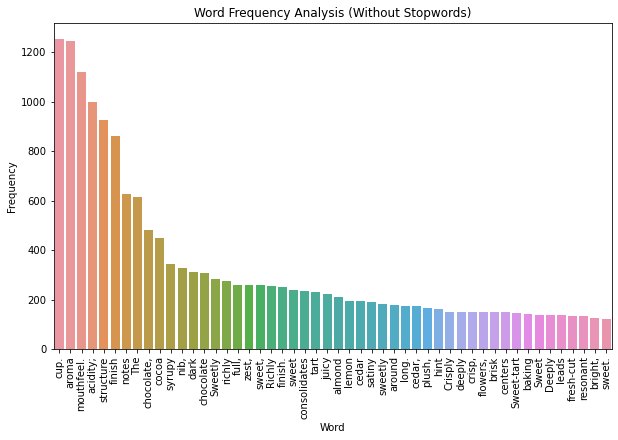

In [24]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
#nltk.download('stopwords')

# Get the English stopwords
english_stopwords = set(stopwords.words('english'))

# Word frequency analysis
words = ' '.join(df['review'])
word_freq = pd.Series(words.split()).value_counts()

# Remove stopwords
word_freq = word_freq[~word_freq.index.isin(english_stopwords)]

# Select the top 50 words after removing stopwords
word_freq = word_freq.head(50)

# Create a bar plot for word frequency analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.index, y=word_freq.values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Analysis (Without Stopwords)')
plt.xticks(rotation=90)
plt.show()

## Sentiment Analysis

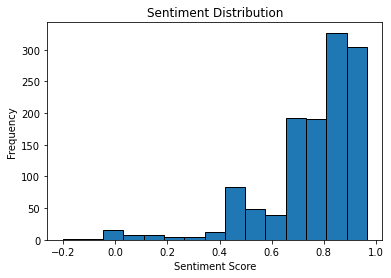

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'review' column
df['sentiment_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sentiment Distribution
plt.hist(df['sentiment_score'], bins=15, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

The sentiment score ranges from -1 to +1, where -1 indicates a highly negative sentiment, 0 represents a neutral sentiment, and +1 indicates a highly positive sentiment.

From the distribution, we can observe that most reviews have positive sentiment scores, as the bins with positive sentiment score ranges have higher frequencies compared to bins with negative sentiment score ranges. The histogram shows a right-skewed distribution, indicating that the majority of reviews are positively oriented. Additionally, there are a significant number of reviews with very high positive sentiment scores, as evidenced by the large counts in the highest bins. This suggests that the reviews in the dataset are generally positive in nature.

#### Categorizing the sentiment scores

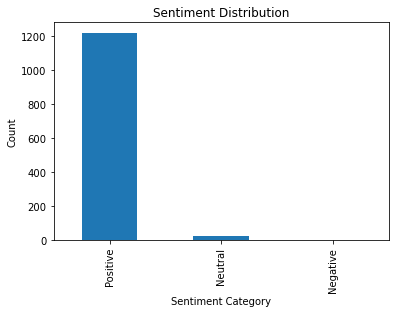

In [26]:
# Categorize the sentiment scores
df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

The reviews in this dataset doesn't contain negative sentiments which means it is biased towards positive reviews. The dataset is not balanced.

In [27]:
# Before COVID-19
df_before = df[df['review_date'] < '2020-03-01']
sentiment_counts_before = df_before['sentiment_category'].value_counts()

# During COVID-19
df_during = df[(df['review_date'] >= '2020-03-01') & (df['review_date'] <= '2021-12-31')]
sentiment_counts_during = df_during['sentiment_category'].value_counts()

# After COVID-19
df_after = df[df['review_date'] > '2021-12-31']
sentiment_counts_after = df_after['sentiment_category'].value_counts()

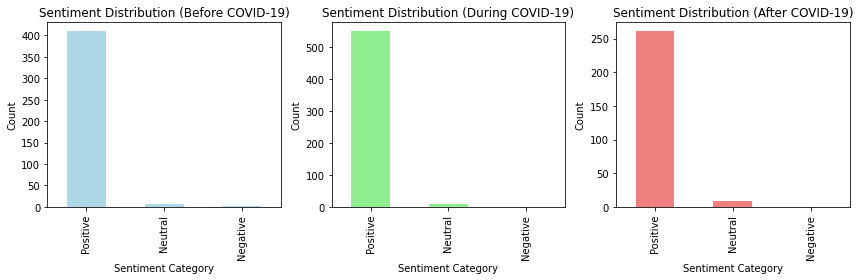

In [28]:
# Plot sentiment distribution for each time period
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sentiment_counts_before.plot(kind='bar', color='lightblue')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution (Before COVID-19)')

plt.subplot(1, 3, 2)
sentiment_counts_during.plot(kind='bar', color='lightgreen')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution (During COVID-19)')

plt.subplot(1, 3, 3)
sentiment_counts_after.plot(kind='bar', color='lightcoral')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution (After COVID-19)')

plt.tight_layout()
plt.show()

#### Word cloud visualization based on the reviews

In [29]:
pip install pandas wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/valentinatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    # Read the dataset from the CSV file with comma as delimiter
    df = pd.read_csv("coffee_dataset.csv", delimiter=',')

    # Check the column names in the DataFrame
    print(df.columns)

    # Concatenate all the review texts into a single string
    reviews_text = ' '.join(df['review'])

    # Generate the word cloud with the Arial font
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/path/to/Arial.ttf').generate(reviews_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except Exception as e:
    print("Error:", e)


Index(['name', 'roaster', 'roast', 'loc_country', 'origin', '100g_USD',
       'rating', 'review_date', 'review'],
      dtype='object')
Error: Only supported for TrueType fonts
